In [24]:
import seaborn as sns
sns.set(style="white")

from scipy import stats
from mne.viz import circular_layout, plot_connectivity_circle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import pyreadstat

from matplotlib import cm
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [25]:
import sys
sys.path.append("..")
import os

%matplotlib inline

import scipy.io as sio
import numpy as np
from nilearn import plotting 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from fctools import networks, figures

#---- matplotlib settings
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'Helvetica'

import scipy.io as scio
import os

In [32]:
module_assignment = modules_rep
print(module_assignment.shape)

(30, 100, 32, 179)


In [5]:
roi_label =[]
node_path = r'H:\Matlab\Software\conn\rois\networks.txt'
with open(node_path,"r") as file:
    for num,line in enumerate(file.readlines()):
#         a = line.split(' ')[0].split('\t')[-1].strip('\n')
    
        a = line.split(' ')[0]
        b = line.split(' ')[1]
        if b == "(L)" or b =="(R)":
#             print(a+b)
            roi_label.append(a+b)
        else:
            roi_label.append(a)
    file.close()
roi_lab_inx = np.array([1]*4+[2]*3+[3]*4+[4]*7+[5]*4+[6]*4+[7]*4+[8]*2)
roi_networks = np.array(['DMN','DMN','DMN','DMN','SMN','SMN','SMN','VIS','VIS','VIS','VIS',"SAN","SAN","SAN","SAN","SAN","SAN","SAN","DAN","DAN","DAN"
          ,"DAN","FPN","FPN","FPN","FPN","LN","LN","LN","LN","CE","CE"])
roi_lab_df = pd.DataFrame({0:roi_lab_inx,1:roi_networks})

In [6]:
roi_label 

['DefaultMode.MPFC',
 'DefaultMode.LP(L)',
 'DefaultMode.LP(R)',
 'DefaultMode.PCC',
 'SensoriMotor.Lateral(L)',
 'SensoriMotor.Lateral(R)',
 'SensoriMotor.Superior',
 'Visual.Medial',
 'Visual.Occipital',
 'Visual.Lateral(L)',
 'Visual.Lateral(R)',
 'Salience.ACC',
 'Salience.AInsula(L)',
 'Salience.AInsula(R)',
 'Salience.RPFC(L)',
 'Salience.RPFC(R)',
 'Salience.SMG(L)',
 'Salience.SMG(R)',
 'DorsalAttention.FEF(L)',
 'DorsalAttention.FEF(R)',
 'DorsalAttention.IPS(L)',
 'DorsalAttention.IPS(R)',
 'FrontoParietal.LPFC(L)',
 'FrontoParietal.PPC(L)',
 'FrontoParietal.LPFC(R)',
 'FrontoParietal.PPC(R)',
 'Language.IFG(L)',
 'Language.IFG(R)',
 'Language.pSTG(L)',
 'Language.pSTG(R)',
 'Cerebellar.Anterior',
 'Cerebellar.Posterior']

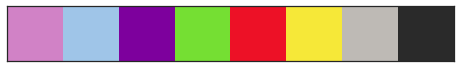

In [204]:
power_colors_new = {'DM':'#d182c6', 
                'SM':'#9fc5e8', 
                'VIS':'#7d009d', 
                'SAN':'#75df33', 
                'DAN':'#ed1126', 
                'FPN"':'#f6e838', 
                'LN':'#bebab5', 
                'CE':'#2a2a2a', 
                }
network_pal = (sns.color_palette(power_colors_new.values()))
sns.palplot(sns.color_palette(power_colors_new.values()))
modules = sorted(roi_networks)

network_lut = dict(zip(map(str, np.unique(modules)), network_pal))

network_colors = pd.Series([str(c) for c in modules]).map(network_lut)
network_colors = np.asarray(network_colors)

n_roi = len(roi_networks)
n_net = len(np.unique(modules))

In [25]:
print(n_roi,n_net)

32 8


#  network level

In [11]:
parcellations = np.asarray([['network32', 'Network32', 32,8],
                            ['power', 'Power', 264,8], 
                            ['schaefer', 'Schaefer', 300,8]])

parcellation = 'network32'
out_dir = 'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\02-multilayer'

save_path = out_dir+'\\'+parcellations[0][1]+'\\'

In [36]:
norm_mean_allegiance = np.load(f'{out_dir}\\{parcellation}\\whole-brain_network_normalized_mean_allegiance_50.npy')
print(norm_mean_allegiance.shape)

(30, 8, 8)


In [13]:
recruitment = pd.DataFrame()
normalized_measures = pd.DataFrame()

group_filter = [[True]*15+[False]*15,[False]*15+[True]*15]
group_label_values= ["Mild","Mild","Severe","Severe","Severe","Severe","Mild",
           "Severe","Severe","Mild","Severe","Severe","Mild","Severe","Mild"]+["Control"]*15

# network32_ubique_networks = np.unique(roi_networks)
network32_ubique_networks =['DMN', 'SMN', 'VIS', 'SAN','DAN', 'FPN', 'LN','CE']

In [14]:
# network32_ubique_networks =['DMN', 'SMN', 'VIS', 'SAN','DAN', 'FPN', 'LN','CE']
for i, sub in enumerate(group_label_values):

        for k, net1 in enumerate(network32_ubique_networks): 

            networks_allegiance = pd.DataFrame()
            
            for l, net2 in enumerate(network32_ubique_networks):
                
                norm_net_allegiance = norm_mean_allegiance[i,k,l]
                pre = pd.DataFrame([[str(i), group_label_values[i], net1, norm_net_allegiance]], 
                                   columns=['Subject', 'Group', 'Network', f'{net2}']) 
                
                if net1 == net2:
                    recruitment = pd.concat((recruitment, pd.DataFrame([[str(i), 
                                                                         group_label_values[i], 
                                                                         net1, 
                                                                         norm_net_allegiance]], 
                                   columns = ['Subject', 'Group', 'Network', 'Recruitment']))) 
                if l == 0:
                    networks_allegiance = pre
                if l > 0:
                    networks_allegiance = pd.merge(networks_allegiance, pre, on = ['Subject', 'Group', 'Network'])
            
            normalized_measures = pd.concat((normalized_measures, networks_allegiance), axis=0)

In [37]:
normalized_measures
# recruitment

,Subject,Group,Network,DMN,SMN,VIS,SAN,DAN,FPN,LN,CE
0,0,Mild,DMN,0.949928,0.845925,1.259319,1.000949,0.945484,1.065588,1.085154,1.062442
0,0,Mild,SMN,0.845925,0.919464,0.829676,1.190305,1.021168,0.881483,0.880592,0.596851
0,0,Mild,VIS,1.259319,0.829676,1.220802,0.974415,1.181365,0.762872,0.901819,1.370327
0,0,Mild,SAN,1.000949,1.190305,0.974415,0.936559,0.951558,0.883038,0.938316,0.861650
0,0,Mild,DAN,0.945484,1.021168,1.181365,0.951558,0.922099,1.092416,1.042845,1.155552
...,...,...,...,...,...,...,...,...,...,...,...
0,29,Control,SAN,0.251406,1.372660,0.238310,1.589491,1.303121,1.092947,1.157740,0.580678
0,29,Control,DAN,0.331930,2.298824,0.400923,1.303121,1.652477,0.239496,0.360110,0.302385
0,29,Control,FPN,0.971485,0.243611,0.748347,1.092947,0.239496,1.516651,1.729899,1.568657
0,29,Control,LN,1.159707,0.379896,0.981742,1.157740,0.360110,1.729899,1.338595,1.271008


In [21]:
recruitment
normalized_measures

out2_dir = 'H:\\Jupyter\\Stroke15\\Multilayer_stroke15\\Results\\02-multilayer\\network32'

normalized_measures.to_csv(f'{out2_dir}\\{parcellation}_mean_allegiance_tidy_tr_50.csv', 
                           index= False)
recruitment.to_csv(f'{out2_dir}\\{parcellation}_recruitment_tr_50.csv', 
                   index=False)

In [45]:
# recruitment

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Recruitment ~ C(Group)', data=recruitment).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Group),2.541874,2.0,15.298757,5.637065e-07
Residual,19.688666,237.0,NaN,NaN


In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Recruitment ~ C(Group) + C(Network) + C(Group):C(Network)', data = recruitment).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Group),2.541874,2.0,19.190340,2.131669e-08
C(Network),3.077198,7.0,6.637674,4.052739e-07
C(Group):C(Network),2.306227,14.0,2.487325,2.727085e-03
Residual,14.305241,216.0,NaN,NaN


# Nodal level 

In [176]:
allegiance_matrixs = np.load(f'{out_dir}\\{parcellation}\\allegiance_matrix_network32_opt_mean_corrected_50.npy')
print(allegiance_matrix.shape)
n_sub = len(allegiance_matrix)
n_roi = np.shape(allegiance_matrix)[1]

(30, 32, 32)


In [192]:
n_roi
roi_lab_inx

array([1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       6, 6, 6, 6, 7, 7, 7, 7, 8, 8])

In [179]:
roi_lab_inx
subj_recruitment = []
subj_integration = []
for i in range(n_sub):
    subj_am = allegiance_matrixs[i,:,:]
    subj_re = []
    subj_in = []
    for roi_i in range(n_roi):
#         print(subj_am[roi_i,:])
#         print(np.mean(subj_am[roi_i,:][4:]))
        net_i = roi_lab_inx[roi_i]
    
#     ## nodal recruitment 
#         same_net_with_i = np.where(roi_lab_inx == net_i)[0]
#         recruitment_i = 0 
# #         print(roi_i,net_i,same_net_with_i)
#         for roi_j in same_net_with_i:
# #             print(roi_j)
#             if not roi_j == roi_i:
#                 recruitment_i += subj_am[roi_i][roi_j]
# #                 print(recruitment_i)
#         subj_re.append(recruitment_i/len(same_net_with_i))
    
    ## nodal intergation
    
        integratio_i = 0
        diff_net_with_i = np.where(roi_lab_inx != net_i)[0]
#         print(diff_net_with_i)
        for roi_k in diff_net_with_i:
            integratio_i += subj_am[roi_i][roi_k]
        subj_in.append(integratio_i/len(diff_net_with_i))  
#         print(subj_in)
        
#     print(subj_re)
#     print(subj_in)
    subj_recruitment.append(subj_re)
    subj_integration.append(subj_in)
 
    
    
# np.save(f'{out_dir}\\{parcellation}\\whole-brain_recruitment_tr_50.npy', np.array(subj_recruitment))
# np.save(f'{out_dir}\\{parcellation}\\whole-brain_integration_tr_50.npy', np.array(subj_integration))

In [116]:
whole_brain_recruitment = pd.DataFrame()
whole_brain_integration = pd.DataFrame()
for i, sub in enumerate(group_label_values):
    print(i, sub)
    for j, roi in enumerate(roi_label):
#         print(j, roi)
        temp1 = pd.DataFrame([[str(i), 
                         sub, 
                         roi, 
                         subj_recruitment[i][j]]], 
                       columns = ['Subject', 'Group', 'ROI', 'Recruitment'])
        temp2 = pd.DataFrame([[str(i), 
                         sub, 
                         roi, 
                         subj_integration[i][j]]], 
                       columns = ['Subject', 'Group', 'ROI', 'Integration'])

        if j == 0:
            roi_recruitment = temp1
            roi_integration = temp2
        else:
            roi_recruitment = pd.concat([roi_recruitment,temp1])
            roi_integration= pd.concat([roi_integration,temp2])
    
    whole_brain_recruitment =  pd.concat([whole_brain_recruitment, roi_recruitment])
    whole_brain_integration =  pd.concat([whole_brain_integration, roi_integration])
    
#     if i ==2:
#         print(whole_brain_recruitment) 
#         print(whole_brain_integration) 
#         break

0 Mild
1 Mild
2 Severe
3 Severe
4 Severe
5 Severe
6 Mild
7 Severe
8 Severe
9 Mild
10 Severe
11 Severe
12 Mild
13 Severe
14 Mild
15 Control
16 Control
17 Control
18 Control
19 Control
20 Control
21 Control
22 Control
23 Control
24 Control
25 Control
26 Control
27 Control
28 Control
29 Control


In [108]:
whole_brain_recruitment.to_csv(f'{out_dir}\\{parcellation}\\whole-brain_recruitment_tr_50.csv')
whole_brain_integration.to_csv(f'{out_dir}\\{parcellation}\\whole-brain_integration_tr_50.csv')

In [110]:
# print(subj_recruitment)

# t1 = np.load(f'{out_dir}\\{parcellation}\\whole-brain_recruitment_tr_50.npy')
# print(t1)
# print(t1.shape)

# t2 = np.load(f'{out_dir}\\{parcellation}\\whole-brain_integration_tr_50.npy')
# print(t2)
# print(t2.shape)
# print(subj_integration)
# print(allegiance_matrixs[1,:,:]) 

t3 = pd.read_csv(f'{out_dir}\\{parcellation}\\whole-brain_recruitment_tr_50.csv')
print(t3)

    Unnamed: 0  Subject   Group                      ROI  Recruitment
0            0        0    Mild         DefaultMode.MPFC     0.198858
1            0        0    Mild        DefaultMode.LP(L)     0.257318
2            0        0    Mild        DefaultMode.LP(R)     0.207666
3            0        0    Mild          DefaultMode.PCC     0.220563
4            0        0    Mild  SensoriMotor.Lateral(L)     0.205276
5            0        0    Mild  SensoriMotor.Lateral(R)     0.080287
6            0        0    Mild    SensoriMotor.Superior     0.226137
7            0        0    Mild            Visual.Medial     0.416374
8            0        0    Mild         Visual.Occipital     0.377897
9            0        0    Mild        Visual.Lateral(L)     0.397997
10           0        0    Mild        Visual.Lateral(R)     0.225447
11           0        0    Mild             Salience.ACC     0.336244
12           0        0    Mild      Salience.AInsula(L)     0.338127
13           0      

In [127]:
import scipy.stats as stats
from bioinfokit.analys import stat

roi_re_groupbyfactor = whole_brain_recruitment.groupby('ROI')

whole_brain_re_ftest_df ={}
whole_brain_re_ftest_df['ROI'] =[]
whole_brain_re_ftest_df['fval'] =[]
whole_brain_re_ftest_df['pval'] =[]

whole_brain_re_post_2test_df ={}
whole_brain_re_post_2test_df ['sig_roi'] =[]
whole_brain_re_post_2test_df ['mild2severe_stat'] =[]
whole_brain_re_post_2test_df ['mild2severe_pval'] =[]
whole_brain_re_post_2test_df ['severe2control_stat'] =[]
whole_brain_re_post_2test_df ['severe2control_pval'] =[]
whole_brain_re_post_2test_df ['mild2control_stat'] =[]
whole_brain_re_post_2test_df ['mild2control_pval'] =[]


for factor, group in roi_re_groupbyfactor:
#     print(factor,group)
#     break
    mild = group[group['Group']=='Mild']
    severe = group[group['Group']=='Severe']
    control = group[group['Group']=='Control']
#     print(control)
#     break
    fvalue, pvalue = stats.f_oneway(mild['Recruitment'],severe['Recruitment'],control['Recruitment'])
#     print(fvalue, pvalue)
    whole_brain_re_ftest_df['ROI'].append(factor)
    whole_brain_re_ftest_df['fval'].append(fvalue)
    whole_brain_re_ftest_df['pval'].append(pvalue)
    
    if pvalue < 0.05:
        whole_brain_re_post_2test_df ['sig_roi'].append(factor)
        
        mild_severe = pd.concat( (mild,severe),axis = 0)
        severe_control = pd.concat( (severe,control),axis = 0)
        mild_control = pd.concat( (mild,control),axis = 0)
        s1 = stat()
        s1.ttest(df = mild_severe, xfac = "Group",res = "Recruitment",test_type=2)
        t1 = s1.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p1 =  s1.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
#         print(t1,p1)
#         print(s1.summary)
#         break
        s2 = stat()
        s2.ttest(df = severe_control, xfac = "Group",res = "Recruitment",test_type=2)
        t2 = s2.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p2 =  s2.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
        s3 = stat()
        s3.ttest(df = mild_control, xfac = "Group",res = "Recruitment",test_type=2)
        t3 = s3.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p3 =  s3.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
        whole_brain_re_post_2test_df ['mild2severe_stat'].append(float(t1))
        whole_brain_re_post_2test_df ['mild2severe_pval'].append(float(p1))
        whole_brain_re_post_2test_df ['severe2control_stat'].append(float(t2))
        whole_brain_re_post_2test_df ['severe2control_pval'].append(float(p2))
        whole_brain_re_post_2test_df ['mild2control_stat'].append(float(t3))
        whole_brain_re_post_2test_df ['mild2control_pval'].append(float(p3))
print(whole_brain_re_post_2test_df)





























{'sig_roi': ['Language.IFG(L)', 'Language.IFG(R)', 'Salience.ACC', 'Salience.AInsula(L)', 'Salience.AInsula(R)', 'Salience.RPFC(L)', 'Salience.RPFC(R)', 'Salience.SMG(L)', 'Salience.SMG(R)', 'SensoriMotor.Lateral(L)', 'SensoriMotor.Lateral(R)', 'SensoriMotor.Superior', 'Visual.Lateral(L)', 'Visual.Lateral(R)', 'Visual.Medial'], 'mild2severe_stat': [-0.718779, 0.547014, 2.22503, 2.66429, 2.12941, 0.879165, 1.29358, 1.84902, 2.5463, 1.40968, 1.14263, 1.69895, -0.352994, -0.527065, -0.0879874], 'mild2severe_pval': [0.484997, 0.593636, 0.0444058, 0.0194748, 0.052906, 0.395272, 0.218325, 0.0873195, 0.0243627, 0.182106, 0.273802, 0.113117, 0.729751, 0.607026, 0.931228], 'severe2control_stat': [2.2348, 3.44375, 4.01796, 6.62988, 7.35583, 4.19169, 3.91253, 5.23294, 5.42917, 3.77059, 3.65795, 2.67397, 3.54975, 3.15767, 2.37196], 'severe2control_pval': [0.0359076, 0.00231609, 0.000577313, 1.14857e-06, 2.31043e-07, 0.000377789, 0.000746344, 3.00269e-05, 1.8759e-05, 0.0

In [240]:
for factor, group in roi_re_groupbyfactor:
    if  factor == 'Salience.ACC':
        mild = group[group['Group']=='Mild']
        severe = group[group['Group']=='Severe']
        control = group[group['Group']=='Control']
        
        severe_control = pd.concat( (severe,control),axis = 0)
        mild_control = pd.concat( (mild,control),axis = 0)
        mild_severe = pd.concat( (mild,severe),axis = 0)
        
        print(mild_severe)
        s1 = stat()
        s1.ttest(df = mild_severe, xfac = "Group",res = "Recruitment",test_type=2)
        t1 = s1.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p1 =  s1.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        print(s1.summary)
        print('##########')
        s2 = stat()
        s2.ttest(df = severe_control, xfac = "Group",res = "Recruitment",test_type=2)
        t2 = s2.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p2 =  s2.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        print(s2.summary)
        print('##########')
        s3 = stat()
        s3.ttest(df = mild_control, xfac = "Group",res = "Recruitment",test_type=2)
        t3 = s3.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p3 =  s3.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        print(s3.summary)

  Subject   Group           ROI  Recruitment
0       0    Mild  Salience.ACC     0.336244
0       1    Mild  Salience.ACC     0.856026
0       6    Mild  Salience.ACC     0.722696
0       9    Mild  Salience.ACC     0.856575
0      12    Mild  Salience.ACC     0.564910
0      14    Mild  Salience.ACC     0.547256
0       2  Severe  Salience.ACC     0.572829
0       3  Severe  Salience.ACC     0.305014
0       4  Severe  Salience.ACC     0.405941
0       5  Severe  Salience.ACC     0.277162
0       7  Severe  Salience.ACC     0.182914
0       8  Severe  Salience.ACC     0.468912
0      10  Severe  Salience.ACC     0.661031
0      11  Severe  Salience.ACC     0.654257
0      13  Severe  Salience.ACC     0.361438

Two sample t-test with equal variance

------------------  -----------
Mean diff            0.215118
t                    2.22503
Std Error            0.0966811
df                  13
P-value (one-tail)   0.0222029
P-value (two-tail)   0.0444058
Lower 95.0%          0.00625138
U

In [130]:
pd.DataFrame(whole_brain_re_ftest_df).to_csv(f'{out_dir}\\{parcellation}\\tr_50_whole-brain_recruitment_ftest.csv')

In [135]:
re_ftest_df = pd.read_csv(f'{out_dir}\\{parcellation}\\tr_50_whole-brain_recruitment_ftest.csv')
sorted_re_ftest_df = re_ftest_df.sort_values('Label') 
sorted_re_ftest_df.to_csv(f'{out_dir}\\{parcellation}\\tr_50_sorted_whole-brain_recruitment_ftest.csv')

In [169]:
sig_re_ind = []
for i in whole_brain_re_post_2test_df['sig_roi']:
    print(i,np.where(np.array(roi_label) == i))
    sig_re_ind.append(np.where(np.array(roi_label) == i)[0][0]+1)
sig_re_ind
whole_brain_re_post_2test_df['Label'] = sig_re_ind

pd.DataFrame(whole_brain_re_post_2test_df).to_csv(f'{out_dir}\\{parcellation}\\tr_50_whole-brain_recruitment_posttest.csv')

Language.IFG(L) (array([26], dtype=int64),)
Language.IFG(R) (array([27], dtype=int64),)
Salience.ACC (array([11], dtype=int64),)
Salience.AInsula(L) (array([12], dtype=int64),)
Salience.AInsula(R) (array([13], dtype=int64),)
Salience.RPFC(L) (array([14], dtype=int64),)
Salience.RPFC(R) (array([15], dtype=int64),)
Salience.SMG(L) (array([16], dtype=int64),)
Salience.SMG(R) (array([17], dtype=int64),)
SensoriMotor.Lateral(L) (array([4], dtype=int64),)
SensoriMotor.Lateral(R) (array([5], dtype=int64),)
SensoriMotor.Superior (array([6], dtype=int64),)
Visual.Lateral(L) (array([9], dtype=int64),)
Visual.Lateral(R) (array([10], dtype=int64),)
Visual.Medial (array([7], dtype=int64),)


In [170]:
pd.DataFrame(whole_brain_re_post_2test_df).to_csv(f'{out_dir}\\{parcellation}\\tr_50_whole-brain_recruitment_posttest.csv')

In [118]:
import statsmodels.api as sm
from statsmodels.formula.api import ols



# model = ols('Recruitment ~ C(Group)', data=whole_brain_recruitment).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table


model = ols('Recruitment ~ C(Group) + C(ROI) + C(Group):C(ROI)', data = whole_brain_recruitment).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Group),3.318566,2.0,71.857544,1.355264e-29
C(ROI),4.584968,31.0,6.405109,3.130991e-23
C(Group):C(ROI),2.814012,62.0,1.965559,2.427853e-05
Residual,19.950872,864.0,NaN,NaN


# Integrataion

In [230]:
# # network integration 
net_integration = []
for i in range(n_sub):
    subj_net_in =[]
    each_in = np.array(subj_integration)[i]
#     print(each_in)
    for net_i in range(n_net):
#         print(np.mean(each_in[roi_lab_inx == net_i+1]))
        subj_net_in.append(np.mean(each_in[roi_lab_inx == net_i+1]))
    net_integration.append(subj_net_in)
#         
print(net_integration)
np.save(f'{out_dir}\\{parcellation}\\brain_net_integration_tr_50.npy', np.array(net_integration))

[[0.3377719962157049, 0.3077628073380528, 0.33057060075685907, 0.31631636707663197, 0.33826099810785243, 0.31863587984862823, 0.33010347682119207, 0.3382317880794702], [0.2927767265846736, 0.4066864580954556, 0.34996984389782415, 0.31231447492904457, 0.4003518211920531, 0.3422475165562915, 0.3938451986754968, 0.3346258278145695], [0.15410655156102177, 0.32886732130623436, 0.27563268684957426, 0.2695413434247871, 0.3348569063386944, 0.2623285241248817, 0.31751655629139075, 0.24759713024282562], [0.3705457663197731, 0.2940054807033569, 0.1580286187322611, 0.38180662251655645, 0.3056409649952696, 0.3652589877010409, 0.3910241248817409, 0.31321192052980135], [0.29086151844843905, 0.3198926695592601, 0.31757627719962167, 0.3134501419110691, 0.3337381740775781, 0.2683343188268685, 0.3168761825922422, 0.25071633554083883], [0.3400147824030275, 0.34248915277460606, 0.3427542573320719, 0.3624064333017976, 0.3370494323557238, 0.36067466887417216, 0.349987582781457, 0.3323576158940398], [0.281270

In [226]:
np.array(net_integraion)
# net_ingetraion[0][0]

(30, 8)

In [229]:
brain_net_integration = pd.DataFrame()
for i, sub in enumerate(group_label_values):
#     print(i, sub)
    for j, net in enumerate(network32_ubique_networks):
#         print(j, net)
        temp = pd.DataFrame([[str(i), 
                         sub, 
                         net, 
                         np.array(net_integration)[i][j]]], 
                       columns = ['Subject', 'Group', 'Net', 'Integration'])
        if j == 0:
            net_integration_t = temp
        else:
            net_integration_t = pd.concat([net_integration_t,temp])
    brain_net_integration = pd.concat([brain_net_integration, net_integration_t])
    
print(brain_net_integration)

   Subject    Group  Net  Integration
0        0     Mild  DMN     0.337772
0        0     Mild  SMN     0.307763
0        0     Mild  VIS     0.330571
0        0     Mild  SAN     0.316316
0        0     Mild  DAN     0.338261
..     ...      ...  ...          ...
0       29  Control  SAN     0.334431
0       29  Control  DAN     0.306082
0       29  Control  FPN     0.366147
0       29  Control   LN     0.399914
0       29  Control   CE     0.374062

[240 rows x 4 columns]


In [218]:
brain_net_integration.to_csv(f'{out_dir}\\{parcellation}\\brain_net_integration_tr_50.csv')

In [216]:
import statsmodels.api as sm
from statsmodels.formula.api import ols



model = ols('Integration ~ C(Group)', data= brain_net_integration).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


# model = ols('Integration ~ C(Group) + C(Net) + C(Group):C(Net)', data = brain_net_integration).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

,sum_sq,df,F,PR(>F)
C(Group),0.020339,2.0,2.015487,0.135533
Residual,1.195816,237.0,NaN,NaN


In [ ]:
## nodal level integration

In [217]:
whole_brain_integration

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Integration ~ C(Group)', data= whole_brain_integration).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Group),0.259047,2.0,28.371288,1.071430e-12
Residual,4.368995,957.0,NaN,NaN


In [188]:
roi_in_groupbyfactor = whole_brain_integration.groupby('ROI')

whole_brain_in_ftest_df ={}
whole_brain_in_ftest_df['ROI'] =[]
whole_brain_in_ftest_df['fval'] =[]
whole_brain_in_ftest_df['pval'] =[]

whole_brain_in_post_2test_df ={}
whole_brain_in_post_2test_df ['sig_roi'] =[]
whole_brain_in_post_2test_df ['mild2severe_stat'] =[]
whole_brain_in_post_2test_df ['mild2severe_pval'] =[]
whole_brain_in_post_2test_df ['severe2control_stat'] =[]
whole_brain_in_post_2test_df ['severe2control_pval'] =[]
whole_brain_in_post_2test_df ['mild2control_stat'] =[]
whole_brain_in_post_2test_df ['mild2control_pval'] =[]


for factor, group in roi_in_groupbyfactor:
#     print(factor,group)
#     break
    mild = group[group['Group']=='Mild']
    severe = group[group['Group']=='Severe']
    control = group[group['Group']=='Control']
#     print(control)
#     break
    fvalue, pvalue = stats.f_oneway(mild['Integration'],severe['Integration'],control['Integration'])
#     print(fvalue, pvalue)
    whole_brain_in_ftest_df['ROI'].append(factor)
    whole_brain_in_ftest_df['fval'].append(fvalue)
    whole_brain_in_ftest_df['pval'].append(pvalue)
    
    if pvalue < 0.05:
        whole_brain_in_post_2test_df ['sig_roi'].append(factor)
        
        mild_severe = pd.concat( (mild,severe),axis = 0)
        severe_control = pd.concat( (severe,control),axis = 0)
        mild_control = pd.concat( (mild,control),axis = 0)
        s1 = stat()
        s1.ttest(df = mild_severe, xfac = "Group",res = "Integration",test_type=2)
        t1 = s1.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p1 =  s1.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
#         print(t1,p1)
#         print(s1.summary)
#         break
        s2 = stat()
        s2.ttest(df = severe_control, xfac = "Group",res = "Integration",test_type=2)
        t2 = s2.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p2 =  s2.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
        s3 = stat()
        s3.ttest(df = mild_control, xfac = "Group",res = "Integration",test_type=2)
        t3 = s3.summary.split('/n')[0].split('\n')[5].split(' ')[-1]
        p3 =  s3.summary.split('/n')[0].split('\n')[9].split(' ')[-1]
        
        whole_brain_in_post_2test_df ['mild2severe_stat'].append(float(t1))
        whole_brain_in_post_2test_df ['mild2severe_pval'].append(float(p1))
        whole_brain_in_post_2test_df ['severe2control_stat'].append(float(t2))
        whole_brain_in_post_2test_df ['severe2control_pval'].append(float(p2))
        whole_brain_in_post_2test_df ['mild2control_stat'].append(float(t3))
        whole_brain_in_post_2test_df ['mild2control_pval'].append(float(p3))
print(whole_brain_in_post_2test_df)
# {'sig_roi': ['Salience.AInsula(L)', 'Salience.SMG(L)', 'Salience.SMG(R)', 'Visual.Lateral(L)'],
#  'mild2severe_stat': [-0.705264, -0.721293, -1.07758, -0.2775], 'mild2severe_pval': [0.49309, 0.4835, 0.300813, 0.78576], 
#  'severe2control_stat': [-2.76179, -2.8857, -2.86902, -2.61812], 
#  'severe2control_pval': [0.0113793, 0.0085823, 0.00891635, 0.0157016],
#  'mild2control_stat': [-1.33841, -1.47269, -1.25801, -2.09181],
#  'mild2control_pval': [0.19656, 0.157207, 0.223629, 0.0501202]}

{'sig_roi': ['Salience.AInsula(L)', 'Salience.SMG(L)', 'Salience.SMG(R)', 'Visual.Lateral(L)'], 'mild2severe_stat': [-0.705264, -0.721293, -1.07758, -0.2775], 'mild2severe_pval': [0.49309, 0.4835, 0.300813, 0.78576], 'severe2control_stat': [-2.76179, -2.8857, -2.86902, -2.61812], 'severe2control_pval': [0.0113793, 0.0085823, 0.00891635, 0.0157016], 'mild2control_stat': [-1.33841, -1.47269, -1.25801, -2.09181], 'mild2control_pval': [0.19656, 0.157207, 0.223629, 0.0501202]}


In [145]:
pd.DataFrame(whole_brain_in_ftest_df).to_csv(f'{out_dir}\\{parcellation}\\tr_50_whole-brain_integration_ftest.csv')

In [166]:
sig_in_ind = []

for i in whole_brain_in_post_2test_df['sig_roi']:
    print(i,np.where(np.array(roi_label) == i))
    sig_in_ind.append(np.where(np.array(roi_label) == i)[0][0]+1)
sig_in_ind

Salience.AInsula(L) (array([12], dtype=int64),)
Salience.SMG(L) (array([16], dtype=int64),)
Salience.SMG(R) (array([17], dtype=int64),)
Visual.Lateral(L) (array([9], dtype=int64),)


[13, 17, 18, 10]

In [156]:
pd.DataFrame(whole_brain_in_ftest_df).to_csv(f'{out_dir}\\{parcellation}\\tr_50_whole-brain_integration_ftest.csv')
sig_roi_label =[] 
whole_brain_in_ftest_df['Label'] = list(np.argsort(roi_label)+1)
in_ftest_df =pd.DataFrame(whole_brain_in_ftest_df)
print(in_ftest_df)
sorted_in_ftest_df = in_ftest_df.sort_values('Label') 
sorted_in_ftest_df.to_csv(f'{out_dir}\\{parcellation}\\tr_50_sorted_whole-brain_integration_ftest.csv')

                        ROI      fval      pval  Label
0       Cerebellar.Anterior  0.412909  0.665831     31
1      Cerebellar.Posterior  0.169949  0.844603     32
2         DefaultMode.LP(L)  0.319970  0.728887      2
3         DefaultMode.LP(R)  0.529783  0.594727      3
4          DefaultMode.MPFC  0.159080  0.853721      1
5           DefaultMode.PCC  0.129048  0.879471      4
6    DorsalAttention.FEF(L)  1.238391  0.305795     19
7    DorsalAttention.FEF(R)  1.440589  0.254414     20
8    DorsalAttention.IPS(L)  1.809955  0.182961     21
9    DorsalAttention.IPS(R)  1.721600  0.197830     22
10   FrontoParietal.LPFC(L)  1.348800  0.276486     23
11   FrontoParietal.LPFC(R)  1.495389  0.242146     25
12    FrontoParietal.PPC(L)  1.189910  0.319704     24
13    FrontoParietal.PPC(R)  0.504117  0.609612     26
14          Language.IFG(L)  2.094342  0.142709     27
15          Language.IFG(R)  0.408958  0.668388     28
16         Language.pSTG(L)  1.644329  0.211900     29
17        

In [173]:
sig_in_ind = []
for i in whole_brain_in_post_2test_df['sig_roi']:
    print(i,np.where(np.array(roi_label) == i))
    sig_in_ind.append(np.where(np.array(roi_label) == i)[0][0]+1)
print(sig_in_ind)
whole_brain_in_post_2test_df['Label'] = sig_in_ind
print(whole_brain_in_post_2test_df)
pd.DataFrame(whole_brain_in_post_2test_df).to_csv(f'{out_dir}\\{parcellation}\\tr_50_whole-brain_integration_posttest.csv')

Salience.AInsula(L) (array([12], dtype=int64),)
Salience.SMG(L) (array([16], dtype=int64),)
Salience.SMG(R) (array([17], dtype=int64),)
Visual.Lateral(L) (array([9], dtype=int64),)
[13, 17, 18, 10]
{'sig_roi': ['Salience.AInsula(L)', 'Salience.SMG(L)', 'Salience.SMG(R)', 'Visual.Lateral(L)'], 'mild2severe_stat': [-0.705264, -0.721293, -1.07758, -0.2775], 'mild2severe_pval': [0.49309, 0.4835, 0.300813, 0.78576], 'severe2control_stat': [-2.76179, -2.8857, -2.86902, -2.61812], 'severe2control_pval': [0.0113793, 0.0085823, 0.00891635, 0.0157016], 'mild2control_stat': [-1.33841, -1.47269, -1.25801, -2.09181], 'mild2control_pval': [0.19656, 0.157207, 0.223629, 0.0501202], 'Label': [13, 17, 18, 10]}


In [174]:
whole_brain_integration

,Subject,Group,ROI,Integration
0,0,Mild,DefaultMode.MPFC,0.309037
0,0,Mild,DefaultMode.LP(L),0.352982
0,0,Mild,DefaultMode.LP(R),0.322822
0,0,Mild,DefaultMode.PCC,0.366246
0,0,Mild,SensoriMotor.Lateral(L),0.313282
...,...,...,...,...
0,29,Control,Language.IFG(R),0.384643
0,29,Control,Language.pSTG(L),0.413186
0,29,Control,Language.pSTG(R),0.415232
0,29,Control,Cerebellar.Anterior,0.378894
